# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [ ]:
# !pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

Importelo usando pandas.

In [2]:
import pandas as pd
from tensorflow.keras.utils import get_file

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
path = get_file("auto-mpg.data", url)
column_names = [
    "mpg", "cylinders", "displacement", "horsepower", "weight",
    "acceleration", "model_year", "origin", "car_name"
]
df = pd.read_csv(path, delim_whitespace=True, names=column_names)
df.head()

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_28456\473074606.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, names=column_names)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Limpia los datos

Trata los missings y variables categóricas

In [3]:
df['car_name'].nunique()

305

In [10]:
df['horsepower'].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [6]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [7]:
df['horsepower'] = df['horsepower'].astype(float)

In [8]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [10]:
df['car_name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [11]:
df['brand'] = df['car_name'].apply(lambda x: x.split()[0].lower())
brand_counts = df['brand'].value_counts()
brands_with_multiple_cars = brand_counts[brand_counts > 1].index

df['car_name'] = df['brand'].apply(lambda x: x if x in brands_with_multiple_cars else 'marca única')

df = df.drop(columns=['brand'])

df['car_name'].nunique()

30

In [12]:
df = pd.get_dummies(df, columns=['car_name'], prefix='car')

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_amc,car_audi,...,car_peugeot,car_plymouth,car_pontiac,car_renault,car_saab,car_subaru,car_toyota,car_volkswagen,car_volvo,car_vw
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,False,False,...,False,True,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,True,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,False,False,...,False,False,False,False,False,False,False,False,False,False


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size= 0.2, random_state= 42)

In [15]:
print(train.shape)
print(test.shape)

(318, 38)
(80, 38)


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [ ]:
import seaborn as sns

sns.pairplot(train, hue='mpg')

Tambien revise las estadisticas generales:

In [16]:
train.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.608176,5.430818,191.904088,103.130503,2969.015723,15.639937,76.103774,1.591195
std,7.930574,1.684947,102.983802,37.085324,840.617729,2.763269,3.603177,0.811696
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,98.500000,75.250000,2220.000000,13.900000,73.000000,1.000000
50%,22.450000,4.000000,148.500000,92.500000,2822.500000,15.500000,76.000000,1.000000
75%,29.725000,6.000000,259.500000,120.000000,3597.250000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,3.000000


### Separa las features del target

Separe el target de las features.

In [17]:
features = train.drop(columns='mpg')
target = train['mpg'] 

print(features.shape, target.shape)

(318, 37) (318,)


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(features)
features_scal = scaler.transform(features)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(254, 37) (64, 37) (254,) (64,)


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

c:\Users\Hugo Trabajo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [36]:
history = model.fit(
    x_train, y_train,
    epochs=1000,
    validation_split=0.2,  # Usar el 20% de los datos de entrenamiento para validación
    verbose=1
)

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 8501.1250 - mae: 51.8147 - mse: 8501.1250 - val_loss: 453.2603 - val_mae: 17.1305 - val_mse: 453.2603
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 331.4785 - mae: 15.0467 - mse: 331.4785 - val_loss: 217.7743 - val_mae: 11.8062 - val_mse: 217.7743
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 154.8658 - mae: 10.1996 - mse: 154.8658 - val_loss: 173.2921 - val_mae: 11.3338 - val_mse: 173.2921
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1480.8618 - mae: 25.0054 - mse: 1480.8618 - val_loss: 365.2140 - val_mae: 16.8764 - val_mse: 365.2140
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 160.9715 - mae: 10.5393 - mse: 160.9715 - val_loss: 158.4122 - val_mae: 10.9549 - val_mse: 158.4122
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 133.2955 - mae: 9.4370 - mse: 133.2955 - val_loss: 2679.8982 - val_mae: 51.2660 - val_mse: 2679.8982
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [37]:
print(history.history)

{'loss': [6121.40576171875, 247.05520629882812, 137.36212158203125, 3019.359375, 138.57012939453125, 149.6931915283203, 2935.26220703125, 277.771484375, 2327.222412109375, 184.92576599121094, 2064.568115234375, 129.6947784423828, 1975.55078125, 847.557861328125, 1479.1026611328125, 1090.1329345703125, 785.4500732421875, 1289.5447998046875, 919.1618041992188, 1415.2816162109375, 709.2821044921875, 1381.20263671875, 859.4393310546875, 1263.7017822265625, 1608.7501220703125, 79.78485107421875, 1322.67138671875, 981.6589965820312, 994.450439453125, 1402.3214111328125, 451.2692565917969, 1265.5133056640625, 1157.6361083984375, 1158.043212890625, 947.8673095703125, 1566.635009765625, 638.4234008789062, 1020.8629150390625, 993.9838256835938, 604.6338500976562, 1340.1505126953125, 733.4113159179688, 1382.7177734375, 491.7253723144531, 1729.467041015625, 525.7805786132812, 1359.47265625, 578.6046752929688, 1047.8411865234375, 744.4029541015625, 1232.611572265625, 599.9652709960938, 920.23309326

¿Alguna conclusión respecto a este gráfico?

Vemos que la péridida baja al inicio como se esperaba, pero luego no se estabiliza, sino que siga con fluctuaciones. Quizá son demasiadas epochs.

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.9225 - mae: 2.3680 - mse: 9.9225 - val_loss: 11.8840 - val_mae: 2.5045 - val_mse: 11.8840
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.3447 - mae: 2.9253 - mse: 14.3447 - val_loss: 52.6629 - val_mae: 6.5249 - val_mse: 52.6629
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51.0985 - mae: 6.4022 - mse: 51.0985 - val_loss: 23.0123 - val_mae: 4.1973 - val_mse: 23.0123
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.5807 - mae: 4.0560 - mse: 22.5807 - val_loss: 31.8685 - val_mae: 4.8690 - val_mse: 31.8685
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.2921 - mae: 4.4169 - mse: 26.2921 - val_loss: 73.8424 - val_mae: 7.5725 - val_mse: 73.8424
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.1164 - mae: 5.6814 - mse: 44.1164 - val_loss: 14.6144 - val_mae: 2.8528 - val_mse: 14.6144
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.5993 - mae: 3.3387 - mse:

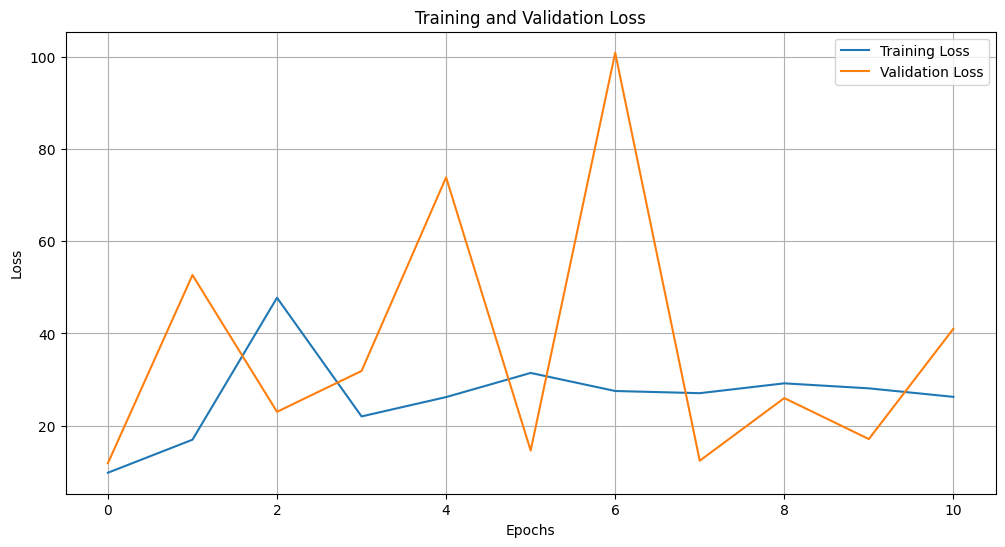

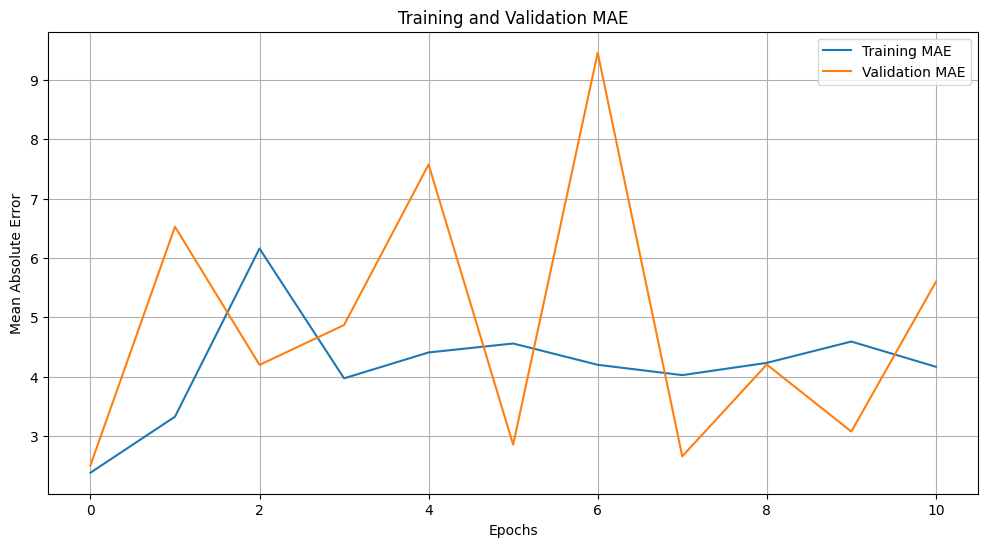

In [39]:
import matplotlib.pyplot as plt
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    x_train, y_train,
    epochs=1000,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


Interpreta el gráfico

No mejora mucho, especialmente con validation. Puede que sigamos en overfitting

Probamos ajustando parámetros.

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40.2146 - mae: 5.5285 - mse: 40.2146 - val_loss: 40.4514 - val_mae: 5.5891 - val_mse: 40.4514
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.0327 - mae: 5.0428 - mse: 33.0327 - val_loss: 62.9212 - val_mae: 7.0061 - val_mse: 62.9212
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30.0717 - mae: 4.3445 - mse: 30.0717 - val_loss: 21.0190 - val_mae: 3.7265 - val_mse: 21.0190
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.7279 - mae: 4.6716 - mse: 30.7279 - val_loss: 20.1138 - val_mae: 3.9159 - val_mse: 20.1138
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.4513 - mae: 4.0510 - mse: 23.4513 - val_loss: 56.0028 - val_mae: 6.8039 - val_mse: 56.0028
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.4329 - mae: 5.5458 - mse: 40.4329 - val_loss: 22.5317 - val_mae: 4.1668 - val_mse: 22.5317
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.4080 - mae: 3.6777 - ms

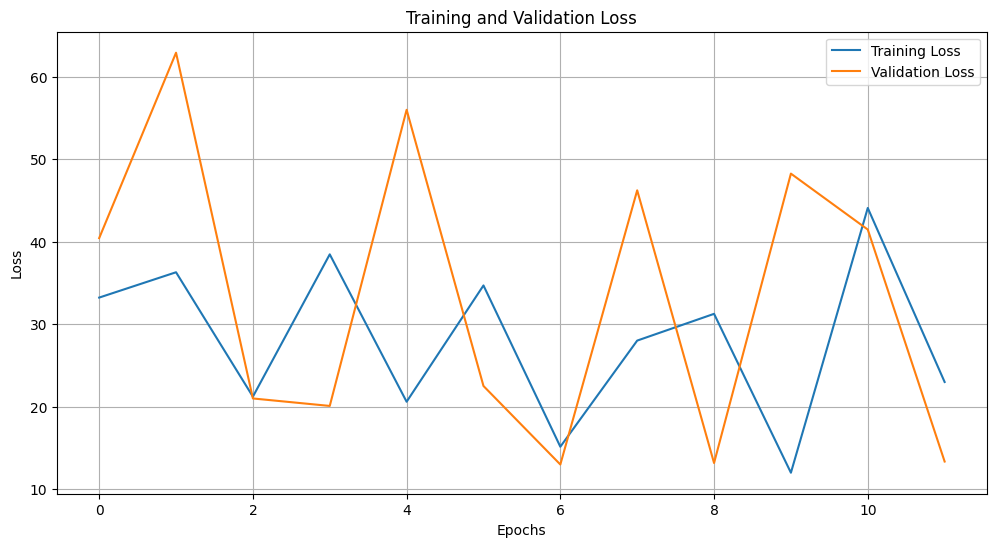

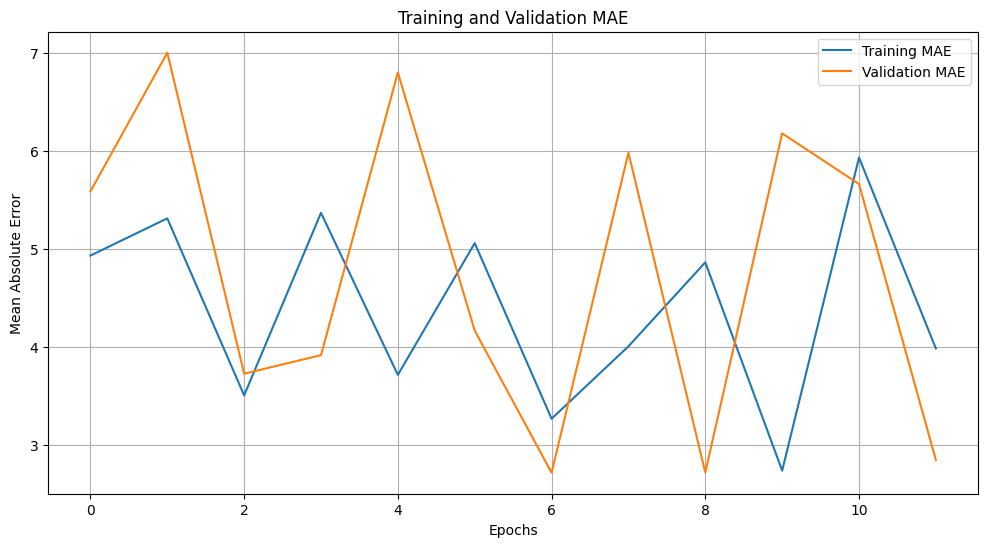

In [42]:
history = model.fit(
    x_train, y_train,
    epochs=1000,
    validation_split=0.2,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

Ha mejorado bastante al ajustar parámetros del EarlyStopping

________________

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [ ]:
results = model.evaluate(x_test, y_test)


print("Test Loss:", results[0])
print("Test MAE:", results[1])
print("Test MSE:", results[2])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.3961 - mae: 2.5707 - mse: 13.3961
Test Loss: 12.11878776550293
Test MAE: 2.4517886638641357
Test MSE: 12.11878776550293


Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [48]:
x_test_samples = test.drop(columns=['mpg'])[:10]
y_test_samples = test['mpg'][:10] 

predictions = model.predict(x_test_samples)

for i in range(10):
    print("Ejemplo", i + 1)
    print("Predicción:", predictions[i])
    print("Valor real:", y_test_samples.iloc[i])
    print("-" * 30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Ejemplo 1
Predicción: [32.18855]
Valor real: 33.0
------------------------------
Ejemplo 2
Predicción: [28.020473]
Valor real: 28.0
------------------------------
Ejemplo 3
Predicción: [17.373196]
Valor real: 19.0
------------------------------
Ejemplo 4
Predicción: [15.39297]
Valor real: 13.0
------------------------------
Ejemplo 5
Predicción: [14.126735]
Valor real: 14.0
------------------------------
Ejemplo 6
Predicción: [26.689987]
Valor real: 27.0
------------------------------
Ejemplo 7
Predicción: [24.850262]
Valor real: 24.0
------------------------------
Ejemplo 8
Predicción: [11.146342]
Valor real: 13.0
------------------------------
Ejemplo 9
Predicción: [17.513165]
Valor real: 17.0
------------------------------
Ejemplo 10
Predicción: [18.948864]
Valor real: 21.0
------------------------------


### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

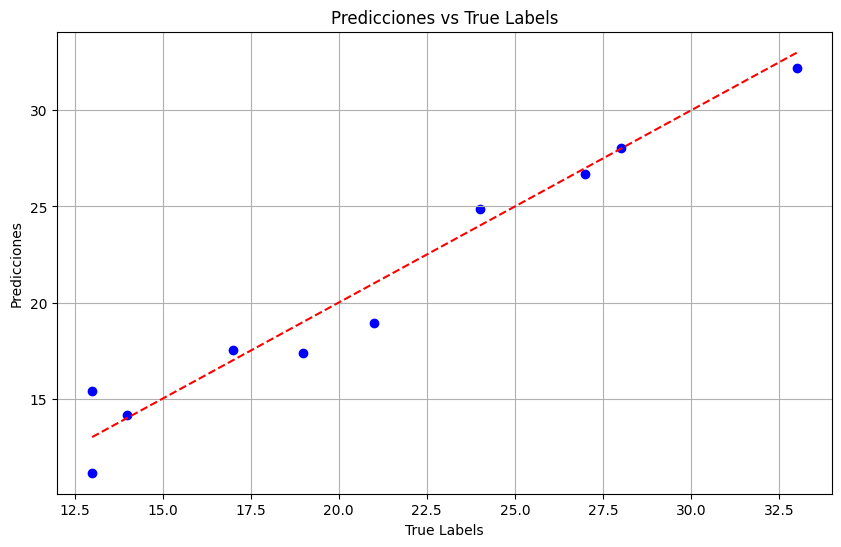

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_samples, predictions, color='blue')
plt.plot([y_test_samples.min(), y_test_samples.max()], [y_test_samples.min(), y_test_samples.max()], 'r--')  # Línea de referencia
plt.xlabel('True Labels')
plt.ylabel('Predicciones')
plt.title('Predicciones vs True Labels')
plt.grid(True)
plt.show()

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.


Representa los residuos en un histograma

In [58]:
type(predictions)

numpy.ndarray

In [60]:
y_test_samples = y_test_samples.values

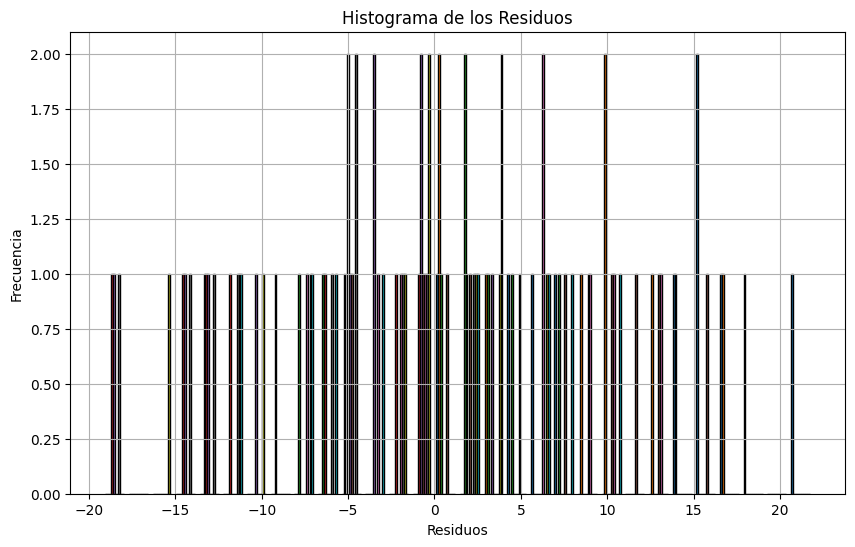

In [64]:
residuos = y_test_samples - predictions

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Residuos')
plt.grid(True)
plt.show()

No entiendo que sucede

Guarda tu modelo en un archivo.

In [65]:
model.save("mpg_model.keras")

## Conclusion

Es dificil, he tenido que pedir mucha ayuda a chatgpt de conceptos y sintaxis, como se habra podido notar. Me ha servido para ir entendiendo mejor conceptos y usos, pero no soy nada autónomo con este modelo aún.